In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=16)  # 这里假设SimSun字体路径，根据实际情况调整

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

import pandas as pd # type: ignore
# 显示所有列
pd.set_option('display.max_columns', None)
# # 显示所有行
pd.set_option('display.max_rows', None) 

# 假设df是已经加载的包含信用得分的DataFrame，并且'credit_score'列包含信用得分
df = pd.read_csv("../Data/Q2_german_credit_data_with_scores.csv")  # 将"your_data.csv"替换为你的数据文件名

# 假设'credit_score'是包含信用得分的列名
X = df[['Credit_Score']]  # 选择信用得分列作为特征


# 使用K-means进行聚类（5个信用等级）
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# 预测所有数据的信用等级
labels = kmeans.predict(X)
# 将信用等级添加回DataFrame
df['Credit_Rating'] = labels

# 计算每个聚类的平均违约率
cluster_default_rates = df.groupby('Credit_Rating')['Y(1=default, 0=non-default)'].mean().sort_values(ascending=False)

# 根据违约率重新分配信用等级（5最高，1最低）
credit_score_mapping = {old_score: new_score for new_score, old_score in enumerate(cluster_default_rates.index, 0)}
df['Credit_Rating'] = df['Credit_Rating'].map(credit_score_mapping)



df.to_csv('../Data/Q4_german_credit_data_with_ratings.csv', index=False)
# 打印结果
print(df[['Credit_Score', 'Credit_Rating']])



d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


     Credit_Score  Credit_Rating
0      792.573065              4
1      330.675005              0
2      824.836760              4
3      711.510050              3
4      357.837203              0
5      711.974546              3
6      811.714232              4
7      684.896668              2
8      803.352639              4
9      347.229286              0
10     499.014079              1
11     347.598425              0
12     725.051836              3
13     388.713145              0
14     571.643077              1
15     384.432421              0
16     808.919174              4
17     677.586916              2
18     318.723808              0
19     792.632117              4
20     823.890402              4
21     762.539607              3
22     776.009643              4
23     753.789325              3
24     800.405213              4
25     681.152389              2
26     716.252919              3
27     700.092532              2
28     781.546056              4
29     320

### 聚类结果可视化（尝试换一种更直观的可视化方式）

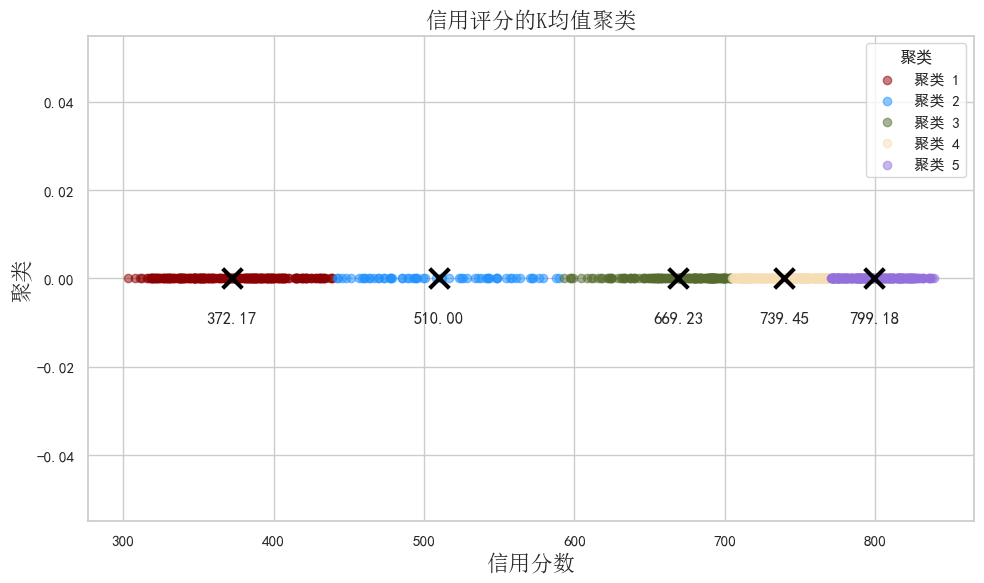

In [6]:
import matplotlib.pyplot as plt


# 绘制聚类结果
plt.figure(figsize=(10, 6))
# 设置y轴的显示范围
#plt.ylim(-1, 1)  # 这里的-1和1应根据实际数据范围调整
# 计算聚类中心
centers = kmeans.cluster_centers_.flatten()

# 绘制每个数据点的散点图，并根据其聚类标签进行着色

# 需要蔺经纬同志调配色！
colors = ['#8B0000', '#1E90FF', '#556B2F', '#F5DEB3', '#9370DB']  # 假设有5个聚类
# 需要蔺经纬同志调配色！

for i, color in enumerate(colors):
    plt.scatter(X[df['Credit_Rating'] == i]['Credit_Score'], [0] * len(X[df['Credit_Rating'] == i]['Credit_Score']), 
                label=f'聚类 {i+1}', color=color, alpha=0.5)

# 绘制聚类中心并标明横坐标
plt.scatter(centers, [0] * len(centers), c='black', marker='x', s=200, linewidths=3, zorder=3)
for i, center in enumerate(centers):
    plt.text(center, -0.01, f'{center:.2f}', ha='center')


plt.grid(True)
# 设置图例
plt.legend(title='聚类')

# 设置x轴标签和标题
plt.xlabel('信用分数',fontproperties=font)
plt.ylabel('聚类',fontproperties=font)
plt.title('信用评分的K均值聚类',fontproperties=font)

plt.savefig('../Data/Q4_kmeans_credit_scores.png')
# 显示图形
plt.tight_layout()
plt.show()

C:\Users\86183\AppData\Local\Temp\ipykernel_25844\3167317102.py:26: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Credit_Rating', y='Credit_Score', data=df,palette=custom_palette, size=3, alpha=0.5)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


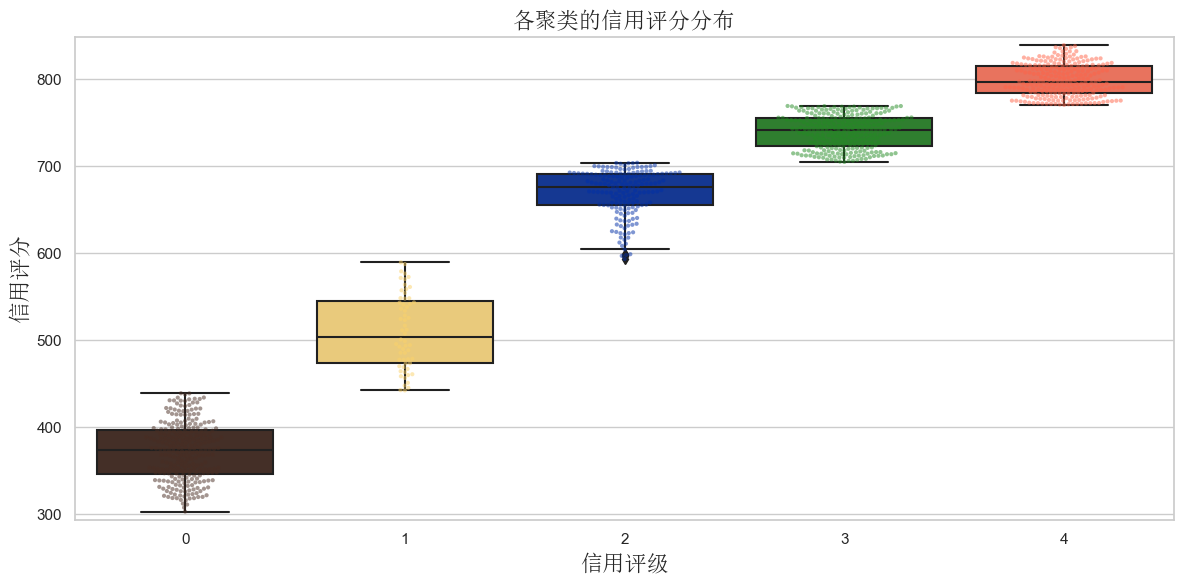

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# 创建一个新的图形
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
custom_palette = sns.color_palette(["#492D22", "#FBD26A", "#002FA7", "#228B22", "#FF6347"])
# 使用seaborn绘制箱线图

sns.boxplot(x='Credit_Rating',y='Credit_Score',palette=custom_palette, data=df)
# 添加标题和标签
plt.title('各聚类的信用评分分布',fontproperties=font)
plt.xlabel('信用评级',fontproperties=font)
plt.ylabel('信用评分',fontproperties=font)

# 调整y轴的范围，使其更贴近数据
y_min = df['Credit_Score'].min() - 10
y_max = df['Credit_Score'].max() + 10
plt.ylim(y_min, y_max)

# 为每个箱子添加数据点的散点图

# 需要蔺经纬同志调配色！
sns.swarmplot(x='Credit_Rating', y='Credit_Score', data=df,palette=custom_palette, size=3, alpha=0.5)
# 需要蔺经纬同志调配色！

# 保存图形
plt.savefig('../Data/Q4_kmeans_credit_scores_boxplot.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.tight_layout()
plt.show()


各信用等级的平均违约率：
Credit_Rating
1    0.973077
3    0.516667
0    0.052023
4    0.015209
2    0.012295
Name: Y(1=default, 0=non-default), dtype: float64


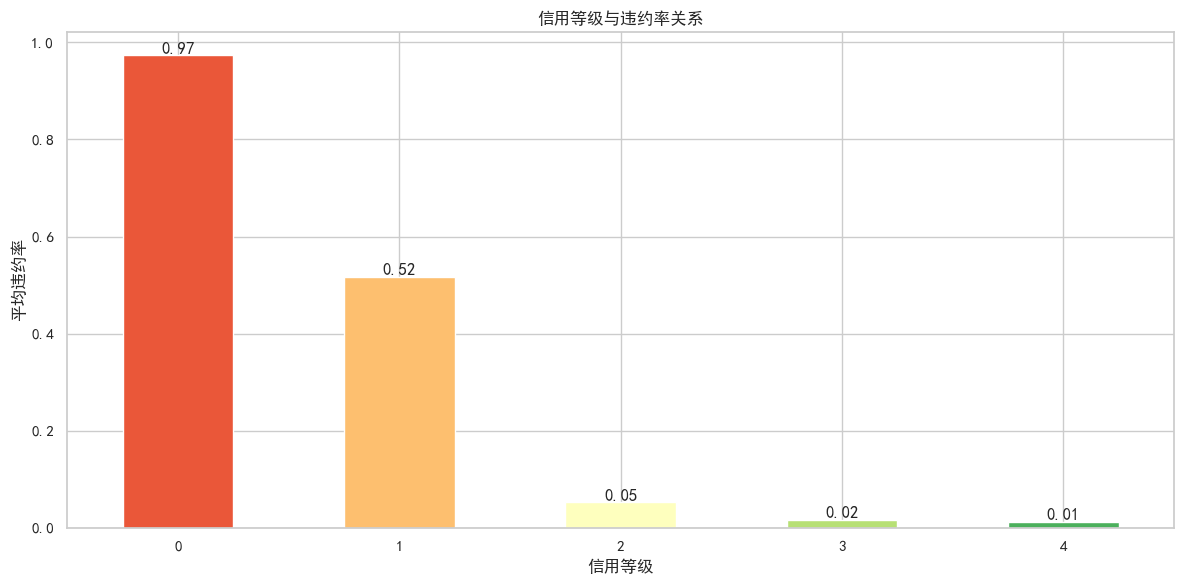

In [4]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
print("\n各信用等级的平均违约率：")
print(cluster_default_rates)

# 可视化信用等级与违约率的关系
plt.figure(figsize=(8, 5))

# 需要蔺经纬同志调配色！
colors = sns.color_palette("RdYlGn", n_colors=len(df['Credit_Rating'].unique()))
#df.groupby('Credit_Rating')['Y(1=default, 0=non-default)'].mean().sort_index().plot(kind='bar')
grouped_data = df.groupby('Credit_Rating')['Y(1=default, 0=non-default)'].mean().sort_index()
ax = grouped_data.plot(kind='bar', color=colors, figsize=(12, 6))
plt.xticks(rotation=45)
# 调整x轴标签
plt.xticks(rotation=45)
# 在每个条形上方添加数值标签
for i, v in enumerate(grouped_data):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
# 调整布局
plt.tight_layout()
# 需要蔺经纬同志调配色！

plt.title('信用等级与违约率关系')
plt.xlabel('信用等级')
plt.ylabel('平均违约率')
plt.xticks(rotation=0)
plt.savefig('../Data/Q4_credit_rating_default_rates.png', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()